Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
import time
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )


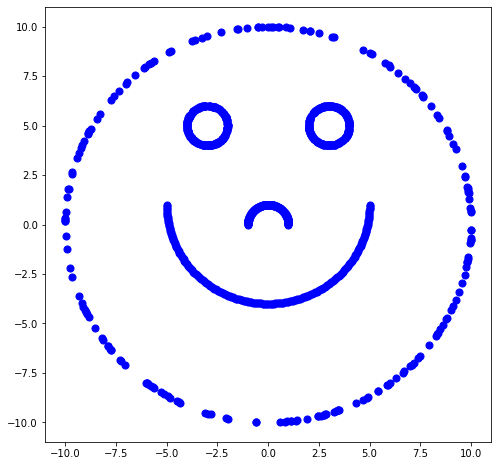

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

In [4]:
##Assigning points to Cluster is functonality of below code
def reassign(X,center,k):
    cluster = {i : [] for i in range(k)} ##Initialize empty clusters
    
    for d in X:
        dist=[]
        for i in range(k):
            dist.append(np.linalg.norm(d-center[i])) ##Calculates eculedian distance
        cluster[dist.index(min(dist))].append(list(d)) ##Append to cluster whose center is at minimum distance
    return cluster

In [5]:
##Calculates centroids of the clusters

def centercalc(center,cluster,k):
    
    for i in range(k):
        if(len(cluster[i])==0):
            center[i] = center[i]
        else:
            center[i] = np.average(cluster[i],axis=0) ##Calculates center of clusters
    
    return center


In [6]:
##Plots the clusters computed

def plotclust(cluster,k):
    plt.figure(figsize=( 8, 8 ))
    cols = ['blue','green','red','orange','purple','cyan','black','yellow','pink','magenta','violet','gold','silver']
    for i in range(k):
        for c in cluster[i]:
            plt.scatter( c[0],c[1], c = cols[i%len(cols)], marker = 'o' )
        

## (A)

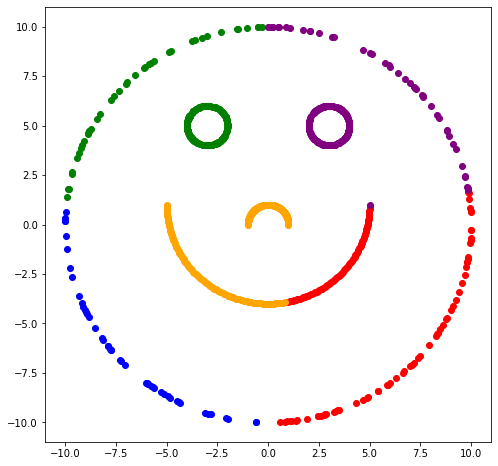

In [7]:
k = 5 ##initialization for 5 clusters

center = {0:[-10,-1],1:[-5.5,7.5],2:[5,1],3:[0,0],4:[7,7]} ##Center initialization
old = list(center.values()).copy() ##Stores a copy of cluster centroids

while(True): ##loops until convergence

    cluster = reassign(X,center,k) ##Computes new cluster assignment

    center = centercalc(center,cluster,k) ##Computes new cluster centroids
  
    if(np.all(np.array(list(old))-np.array(list(center.values()))<10**(-20))): ##Check if cluster centroid change is less than threshold
        break
    old = list(center.values()).copy()##Stores current cluster centroids
    
 
plotclust(cluster,k) ##Plots final cluster assignments

## (B)

In [8]:
##Function to initialize centroids of clusters
def centerint(X,k):
    center= {}
    randindex = rnd.randint(0,1000)
    center[0] = X[randindex].tolist() ##Randomly choose a point as cluster centroid for 1st cluster and remove it from X
    X = np.delete(X,randindex,axis=0)
    for a in range(1,k): ##For remaining cluster centroids
        dist = np.array([])
        for x in X:
            dist = np.append(dist,np.min(np.sum((x-np.array([list(center.values())]))**2))) ##Distance of each point from already initialixed cluster centroids

        prob = dist/np.sum(dist) ##Probability is inverse of distance from nearest cluster centroid
        cumm_prob = np.cumsum(prob)
        j = rnd.random() ##Generate a float no
        i = 0
        for index,p in enumerate(cumm_prob):
            if(j<p): ##Choose point whose probability is greater than j 
                i = index
                break
        center[a] = X[i].tolist() ##Initialize chosen point as centroid of ath cluster
        X = np.delete(X,i,axis=0) ## Remove the point from X for further consideration
  
    return center

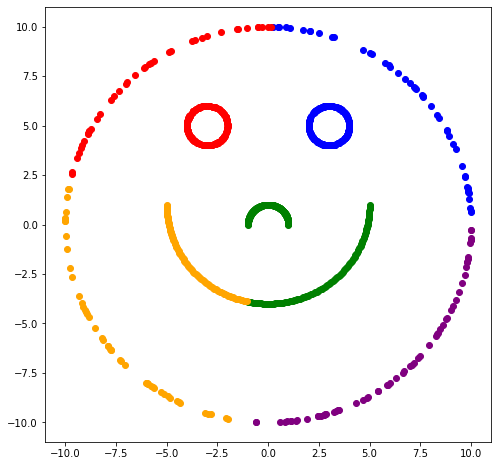

In [9]:
k = 5   ##Initializze to 5 clusters
center = centerint(X,k)##Initialize cluster centroids

old = list(center.values()).copy() ##Store copy of cluster centroids
while(True): ##Repeat until convergence
    cluster = reassign(X,center,k) ##Compute new Cluster assignments
    center = centercalc(center,cluster,k) ##Compute new cluster centroids
    if(np.all(np.array(list(old))-np.array(list(center.values()))<10**(-20))): ##If change in cluster centroid is less than threshold break
        break
    old = list(center.values()).copy() ##Stores copy of cluster centroids to compare
plotclust(cluster,k)##Plots final cluster assignments

## (C)

In [10]:
##Calculates inertia of each cluster 
##Inertia is sum of distnace of each point in cluster from centroid
def inertia(X,cluster,center,k):
    inertia = 0
    for i in range(k):
        c = np.array(center[i])
        d = 0
        for j in cluster[i]:
            d += np.sum((j-c)**2)
        inertia+=d
    return inertia

In [11]:
##We check for No of clusters from 1 to 20, to find elbow point which is a trade off point between 
## inertia and K value. We prefer low inertia and small k value

inert = []
for k in range(1,21):
    center = centerint(X,k)
    old = list(center.values()).copy()
    while(True):
        cluster = reassign(X,center,k)
        center = centercalc(center,cluster,k)
        if(np.all(np.array(list(old))-np.array(list(center.values()))<10**(-20))):
            break
        old = list(center.values()).copy()

    inert.append(inertia(X,cluster,center,k))


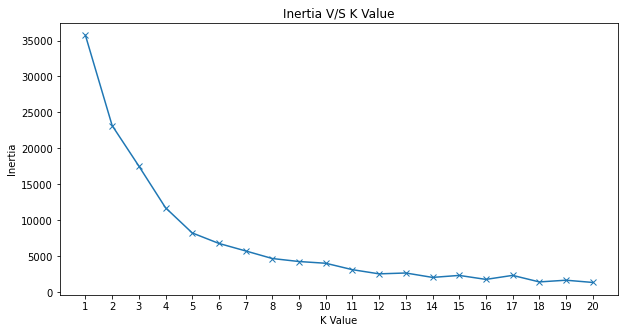

In [12]:
plt.figure(figsize=(10,5))

plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.plot([i for i in range (1,len(inert)+1)],inert,marker='x')
plt.title('Inertia V/S K Value')
plt.xticks([i for i in range (1,len(inert)+1)])
print()

## From Elbow Method it is observed that optimal K value generally is in range from 4 to 7 for best clustering based on inertia parameter which is sum of all clusters individually point distance from center.

## In my opinion better clustering result is possible

## (D)

In [13]:
##Radial Basis Function Kernel has been implemented
def gausskernel(x,y,var):
    dist = lin.norm(x-y)**2
    res = np.exp(-(dist)/(2*(var**2)))
    return res


In [14]:
##Function to compute cluster assignments using RBF instead of eucledian distance

def reassign2(X,center,k,var):
    cluster = {i : [] for i in range(k)} ##Initialize empty clusters
    
    for d in X:
        dist=[]
        for i in range(k):
            dist.append(gausskernel(d,center[i],var)) ##Calculates eculedian distance
        cluster[dist.index(max(dist))].append(list(d)) ##Append to cluster whose center is most similar
    return cluster

## Gaussian Kernel with 4 Clusters 

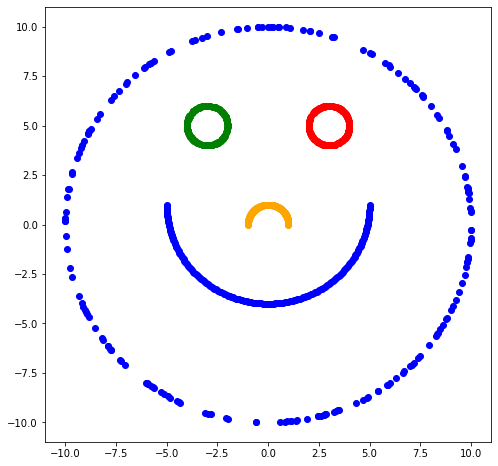

In [15]:
k = 4 ##Initializze to 4 clusters

center = {0:[-10,-1],1:[-5.5,7.5],2:[5,1],3:[0,0]} ##Initialize cluster centroids

old = [] ##To store cluster assignments for comparision
while(True):

    cluster = reassign2(X,center,k,0.1) ##Compute new Cluster assignments
 
    center = centercalc(center,cluster,k)##Compute new cluster centroids

    if(np.all(np.array(list(old))==np.array(list(cluster.values())))): ##If cluster assignment does not change then converged
        break
    
    old = list(cluster.values()).copy() ##Stores copy of cluster centroids to compare

plotclust(cluster,k)##Plots final cluster assignments


## Gaussian Kernel with 5 Clusters 

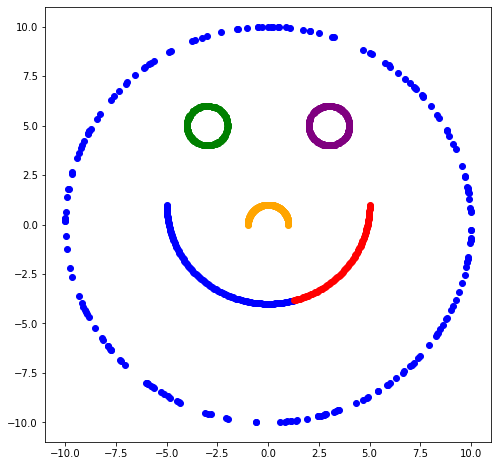

In [16]:
k = 5 ##Initializze to 5 clusters

center = {0:[-10,-1],1:[-5.5,7.5],2:[5,1],3:[0,0],4:[7,7]} ##Initialize cluster centroids

old = [] ##To store cluster assignments for comparision
while(True):

    cluster = reassign2(X,center,k,0.095) ##Compute new Cluster assignments
 
    center = centercalc(center,cluster,k)##Compute new cluster centroids

    if(np.all(np.array(list(old))==np.array(list(cluster.values())))): ##If cluster assignment does not change then converged
        break
    
    old = list(cluster.values()).copy() ##Stores copy of cluster centroids to compare

plotclust(cluster,k)##Plots final cluster assignments


### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

## (A)

````{div} full-width
````
## Derivation of E-step and M-step for EM Algorithm on GMM where mixture weights $\pi_k$ are known and covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$ <br><br>


$\large{\text{ A Gaussian Mixture Distribution: }}$ <br><br>

$$\large{
p(\mathbf{x})=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} \mid \mu_{k}, \Sigma_{k}\right)}
$$ <br><br>

$\large{\text{Let } z \text{ be a latent variable then }}$ <br><br>

$$\large{
z \sim \text { Categorical }(\pi) \quad \text { (where } \pi_{k} \geq 0, \quad \sum_{k} \pi_{k}=1 \text { ) }}
$$<br><br>

$\large{\text{Joint Distribution }}$ <br><br>

$$\large{
p(\mathrm{x}, \mathrm{z})=p(\mathrm{z}) p(\mathrm{x} \mid \mathrm{z})}
$$<br><br>

$\large{\text{Let }\theta \text{ be set of parameters }\pi, \mu, \Sigma}$ <br><br>

$\large{\text{Likelihood is }}$ <br><br>


$$\large{
\begin{aligned}
L(\theta \mid \mathbf{X})&= p(\mathbf{X} \mid \theta) \\ \\
&=\prod_{i} p\left(x_{i} \mid \theta\right) \\ \\
&=\prod_{i}\left(\sum_{k = 1}^{K} \pi_{k} \mathrm{~N}\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)
\end{aligned}}
$$<br><br>

$\large{\text{Log Likelihood is }}$ <br><br>

$$\large{
\begin{aligned}
\ell(\mathbf{X} \mid \theta)&=\ln L(\mathbf{X} \mid \theta)\\ \\ &=\sum_{i} \log \left(\sum_{k=1}^{K} \pi_{k} N\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)
\end{aligned}}
$$<br><br>

$\large{\text{Jensen's Inequality is }}$ <br><br>

$$\large{
\log \left(\sum_{k=1}^{K} \alpha_{k} x_{k}\right) \geqslant \sum_{k=1}^{K} \alpha_{k} \log \left(x_{k}\right)}
$$<br><br>
$\large{\text{where } \alpha_{k} \text{ is weight of point } x_k}$ <br><br>

$\large{\text{We will use above inequality to define the lower bound on log likelihood which is dependent on } \theta \text{ and }E[z_n]}$ <br><br>

$$\large{
\begin{aligned}
\log \left(p\left(x_{i} \mid \theta\right)\right) &=\log \left(\sum_{k=1}^{K} p\left(x_{i} \mid z_{i}=k, \theta\right) p\left(z_{i}=k \mid \theta\right)\right) \\ \\
&=\log \left(\sum_{k=1}^{K} p\left(x_{i}, z_{i}=k \mid \theta\right)\right) \\ \\
&=\log \left(\sum_{k=1}^{K} \frac{E[z_{ik}]}{E[z_{ik}]} p\left(x_{i}, z_{i}=k \mid \theta\right)\right) \\ \\
&=\log \left(\sum_{k=1}^{K} E[z_{ik}] \frac{p\left(x_{i}, z_{i}=k \mid \theta\right)}{E[z_{ik}]}\right)
\end{aligned}}
$$<br><br>

$\large{\text{Using Jensen's Inequality } }$ <br><br>

$$\large{
\begin{aligned}
&=\log \left(\sum_{k=1}^{K} E[z_{ik}] \frac{p\left(x_{i}, z_{i}=k \mid \theta\right)}{E[z_{ik}]}\right) \geqslant \sum_{k=1}^{K} E[z_{ik}] \log \left(\frac{p\left(x_{i}, z_{i}=k \mid \theta\right)}{E[z_{ik}]}\right)\\ \\
&=\mathcal{L_{i}}(\theta, E[z_i])
\end{aligned}}
$$
<br><br>

## E Step
<br><br>
$$\large{
E[z_{ik}]=p\left(z_{n}=k \mid x_{n} , \pi, \mu, \Sigma\right)}
$$<br><br>


$\large{\text{Conditional Probability using Bayes Rule of  }z \text{ given } x}$ <br><br>

$$ \large{
\begin{aligned}
E[z_{ik}]=p(z=k \mid \mathbf{x}) &=\frac{p(z=k) p(\mathbf{x} \mid z=k)}{p(\mathbf{x})} \\ \\
&=\frac{p(z=k) p(\mathbf{x} \mid z=k)}{\sum_{k=1}^{K} p(z=k) p(\mathbf{x} \mid z=k)} \\ \\
&=\frac{\pi_{k} \mathcal{N}\left(\mathbf{x} \mid \mu_{k}, \Sigma_{k}\right)}{\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(\mathbf{x} \mid \mu_{k}, \Sigma_{k}\right)}
\end{aligned}}
$$
<br><br>


## M Step
<br><br>

$\large{\text{We fix } E[z_i] \text{ and maximize the lower bound}}$ <br><br>

$$\large{
\begin{aligned}
\mathcal{L}(\theta, E[z_i])&=\sum_{i} \sum_{k=1}^{K} E[z_{ik}]\log \left(\frac{p\left(x_{i}, z_{i}=k \mid \theta\right)}{E[z_{ik}]}\right) \\ \\
&=\sum_{i} \sum_{k=1}^{K} E[z_{ik}] \log \left(p\left(x_{i}, z_{i}=k \mid \theta\right)\right)-\sum_{i} \sum_{k=1}^{K} E[z_{ik}] \log \left(E[z_{ik}]\right)
\end{aligned}}
$$<br><br>

$\large{\text{Second term in above equation is not dependent on } \theta }$ <br><br>


$$\large{
\mathcal{L}(\theta, E[z_i])=\mathbb{E}_{E[z_i]} \log P(X, Z \mid \theta)}
$$<br><br>

$\large{\text{Now to maximize lower bound we have to find parameter values for which partial derivative respect to them is 0}}$ <br><br>

$$\large{
\begin{array}{r}
\max _{\theta} \mathcal{L}(\theta,E[z_{ik}]) \Leftrightarrow \nabla_{\theta} \mathcal{L}(\theta, E[z_{ik}])=  0 \\ \\
\Leftrightarrow\left\{\begin{array}{l}
\frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \Sigma_{k}}= 0 \\ \\
\frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \mu_{k}}=0
\end{array}\right.
\end{array}}
$$<br><br>


$\large{\text{First lets compute mean vector } \mu_k}$ <br><br>

$$\large{
\begin{align}
& \frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \mu_{k}}=0 \\ \\ 
& \frac{\partial}{\partial \mu_{k}}\left(\sum_i \sum_{k=1}^{K} E[z_{ik}] \log \left(\pi_{k} \mathrm{~N}\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \mu_{k}}\left(\sum_{i} E[z_{ik}] \log \left(\pi_{k}\right)+\sum_{i} E[z_{ik}] \log \left(\mathrm{N}\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \mu_{k}}\left(\sum_{i} E[z_{ik}] \log \left(\frac{1}{(2 \pi)^{(N / 2)}\left|\Sigma_{k}\right|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right]\right)=0 \\ \\
& \frac{\partial}{\partial \mu_{k}}\left(\sum_{i} E[z_{ik}] \log \left(\frac{1}{(2 \pi)^{(N / 2)}\left|\Sigma_{k}\right|^{1 / 2}}\right)+\sum_{i} E[z_{ik}] \log \left(\exp \left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \sum_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \mu_{k}}\left(\sum_{i} E[z_{ik}]\left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \sum_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)=0
\end{align}}
$$<br><br>

$\large{\text{Using below mentioned formula about symmetric matrix W , vector x and scalar s}}$ <br><br>

$$\large{
\frac{\partial}{\partial s}(\mathbf{x}-s)^{T} \mathbf{W}(\mathbf{x}-s)=-2 \mathbf{W}(\mathbf{x}-s)}
$$<br><br>

$$\large{
\begin{aligned}
& \frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \mu_{k}}=0 \\ \\
& \sum_{i} E[z_{ik}]\left(-\frac{1}{2}\left(-2 \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)=0 \\ \\ 
& \sum_{i} E[z_{ik}] \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)=0 \\ \\
& \sum_{i} E[z_{ik}] \Sigma_{k}^{-1} x_{i}-\sum_{i} E[z_{ik}] \Sigma_{k}^{-1} \mu_{k}=0 \\ \\ 
& \mu_{k}= \frac{ \sum_{i} E[z_{ik}] \Sigma_{k}^{-1} x_{i}} {\sum_{i} E[z_{ik}] \Sigma_{k}^{-1}} \\ \\
& \mu_{k}= \frac {\sum_{i} E[z_{ik}] x_{i} }{\sum_i E[z_{ik}]}
\end{aligned}}
$$<br><br>

$\large{\text{Now lets compute Covariance Matrix } \Sigma_k}$ <br><br>

$$\large{
\begin{align}
& \frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \Sigma_{k}}=0 \\ \\ 
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_i \sum_{k=1}^{K} E[z_{ik}] \log \left(\pi_{k} \mathrm{~N}\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_{i} E[z_{ik}]\log \left(N\left(x_{i} \mid \mu_{k}, \Sigma_{k}\right)\right)\right)=0  \\ \\
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_{i} E[z_{ik}]\log \left(\frac{1}{(2 \pi)^{(N / 2)}\left|\Sigma_{k}\right|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_{i} E[z_{ik}]\left(\log \left(\frac{1}{(2 \pi)^{(N / 2)}}\right)+\frac{1}{2} \log \left(\frac{1}{\left|\sum_{k}\right|}\right)+\log \left(\exp \left(-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)\right)\right)=0 \\ \\
& \frac{\partial}{\partial \Sigma_{k}}\left(\sum_{i} E[z_{ik}] \left(\frac{1}{2} \log \left(\frac{1}{\left|\sum_{k}\right|}\right)-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \Sigma_{k}^{-1}\left(x_{i}-\mu_{k}\right)\right)\right)=0
\end{align}}
$$<br><br>


$\large{\text{As mentioned in question}}$ <br><br>

$$
\large{
\begin{aligned}
 \Sigma_{k}^{-1} &= \frac{1}{\sigma_k^2} I \\ \\
\mid \Sigma_{k}^{-1} \mid &= \sigma_{k}^{-2D}
\end{aligned}}
$$<br><br>

$$\large{
\begin{align}
& \frac{\partial \mathcal{L}(\theta, E[z_{ik}])}{\partial \sigma_{k}}=0 \\ \\ 
& \frac{\partial}{\partial \sigma_{k}}\left(\sum_{i} E[z_{ik}] \left(\frac{1}{2} \log \left(\frac{1}{\sigma_{k}^{2D}}\right)-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \sigma_{k}^{-2}\left(x_{i}-\mu_{k}\right)\right)\right)=0 \\ \\ 
& \frac{\partial}{\partial \sigma_{k}}\left(\sum_{i} E[z_{ik}] \left(-D \log \left(\sigma_{k}\right)-\frac{1}{2}\left(x_{i}-\mu_{k}\right)^{T} \sigma_{k}^{-2}\left(x_{i}-\mu_{k}\right)\right)\right)=0 \\ \\ 
& \sum_{i} E[z_{ik}] \left(- \frac {D} {\sigma_{k}}+\frac {\left(x_{i}-\mu_{k}\right)^{T} \left(x_{i}-\mu_{k}\right)} {\sigma_k^3}\right) = 0 \\ \\
& \sum_{i} E[z_{ik}] \left(- D +\frac {\left(x_{i}-\mu_{k}\right)^{T} \left(x_{i}-\mu_{k}\right)} {\sigma_k^2}\right) = 0 \\ \\
& D \sum_{i} E[z_{ik}] = \sum_{i} E[z_{ik}] \left(\frac {\left(x_{i}-\mu_{k}\right)^{T} \left(x_{i}-\mu_{k}\right)} {\sigma_k^2}\right) \\ \\
& {\sigma_k^2} = \frac {\sum_{i} E[z_{ik}] \quad {\mid \mid x_i - \mu_k \mid \mid}^2 } {D \sum_{i} E[z_{ik}]} \\ \\
\end{align}}
$$<br><br>


### Parameter  Updation :

$$\large{\mu_{k}= \frac {\sum_{i} E[z_{ik}] x_{i} }{\sum_i E[z_{ik}]}} $$<br><br>

$$ \large{{\sigma_k^2} = \frac {\sum_{i} E[z_{ik}] \quad {\mid \mid x_i - \mu_k \mid \mid}^2 } {D \sum_{i} E[z_{ik}]}} $$<br><br>

$$ \large{\Sigma_k} = \sigma_k^2 I $$<br><br>


## (B)

In [17]:
from sklearn.datasets import make_blobs
from IPython.display import display, Latex ##Used to print latex formatted text


In [18]:
##Below generates synthethic data 
x,membership = make_blobs(n_samples=1000, centers=[[1.5,6],[5,4],[-0.5,3.0]], cluster_std=0.7 ,n_features=2)

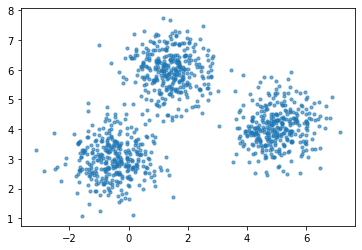

In [19]:
##Plots the synthetic data generated
plt.scatter(x[:,0], x[:,1], alpha = 0.6, s=10)
print()

In [20]:
##Finds the probability of a point belonging to a cluster
def density(x, d, m, cov):
    x_m = x - m
    res = (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(cov))) * np.exp(-(np.linalg.solve(cov, x_m).T.dot(x_m)) / 2))
    return res

In [21]:
## Initialize mean and variance for each cluster
initmu = np.array([[0,4],[8,1],[-3,-2.5]])
identity = np.array([[1.0,0.0],[0.0,1.0]])
initsigma = np.array([0.5,0.5,0.5])

In [22]:
##Fuction to calcualte euclidean distance
def euclidean(x,y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

In [23]:
while 1:  ##Loop until convergence
    cov = [a*identity for a in initsigma] ##Spherical Covariance as given in question
    
    ## E step
    
    ## Using formula derived in E step for E[z_ik], ie probability that point i is in cluster k
    w1 = []
    w2 = []
    w3 = []
    
    for i in x:
        weight = (1/3)*density(i,2,initmu[0],cov[0])
        weight = weight/((1/3)*density(i,2,initmu[0],cov[0]) + (1/3)*density(i,2,initmu[1],cov[1]) + (1/3)*density(i,2,initmu[2],cov[2]))
        w1.append(weight)
    for i in x:
        weight = (1/3)*density(i,2,initmu[1],cov[1])
        weight = weight/((1/3)*density(i,2,initmu[0],cov[0]) + (1/3)*density(i,2,initmu[1],cov[1]) + (1/3)*density(i,2,initmu[2],cov[2]))
        w2.append(weight)
    for i in x:
        weight = (1/3)*density(i,2,initmu[2],cov[2])
        weight = weight/((1/3)*density(i,2,initmu[0],cov[0]) + (1/3)*density(i,2,initmu[1],cov[1]) + (1/3)*density(i,2,initmu[2],cov[2]))
        w3.append(weight)
    
    ## M Step
    
    mu = np.array([[0.0,0.0],[0.0,0.0],[0.0,0.0]]) ##Initialize all cluster means to zero
    sigma = np.array([0.0,0.0,0.0]) ##Initialize variance of clusters to 0
    
    ##Using formulas derived above for mu and sigma square we compute 
    
    for i in range(0,len(x)):
        mu[0] = mu[0] + x[i]*w1[i]
        mu[1] = mu[1] + x[i]*w2[i]
        mu[2] = mu[2] + x[i]*w3[i]
        sigma[0] = sigma[0] + w1[i]*euclidean(x[i],initmu[0])
        sigma[1] = sigma[1] + w2[i]*euclidean(x[i],initmu[1])
        sigma[2] = sigma[2] + w3[i]*euclidean(x[i],initmu[2])

    mu[0] = mu[0]/sum(w1)
    mu[1] = mu[1]/sum(w2)
    mu[2] = mu[2]/sum(w3)
    sigma[0] =sigma[0]/(sum(w1)*2)
    sigma[1] =sigma[1]/(sum(w2)*2)
    sigma[2] =sigma[2]/(sum(w3)*2)

    if np.all(abs(sigma-initsigma)<10**(-8)) and np.all(abs(mu-initmu)<10**(-8)): ##If change in mean and variance below threshold then break
        break
    else:
        initsigma = np.copy(sigma)
        initmu = np.copy(mu)
        



In [24]:
display(Latex('Cluster 1 ' + '$ \mu = $'+ f' {initmu[0][0]} , {initmu[0][1]} and ' + '$ \sigma^2 = $'+f' {initsigma[0]}'))
display(Latex('Cluster 2 ' + '$ \mu = $'+ f' {initmu[1][0]} , {initmu[1][1]} and ' + '$ \sigma^2 = $'+f' {initsigma[1]}'))
display(Latex('Cluster 3 ' + '$ \mu = $'+ f' {initmu[2][0]} , {initmu[2][1]} and ' + '$ \sigma^2 = $'+f' {initsigma[2]}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

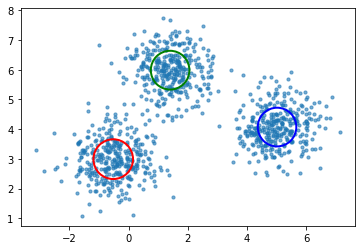

In [25]:
##Plots the resultant spherical clusters with center as mu and radius as square root of variance
fig, ax = plt.subplots()
circle1 = plt.Circle((initmu[0][0],initmu[0][1]),np.sqrt(initsigma[0]),color='green',fill=False,lw=2)
ax.add_patch(circle1)
circle2 = plt.Circle((initmu[1][0],initmu[1][1]),np.sqrt(initsigma[1]),color='blue',fill=False,lw=2)
ax.add_patch(circle2)
circle3 = plt.Circle((initmu[2][0],initmu[2][1]),np.sqrt(initsigma[2]),color='red',fill=False,lw=2)
ax.add_patch(circle3)
plt.scatter(x[:,0], x[:,1], alpha = 0.6, s=10)

plt.show()